# Exchange rates

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Exchange Rates.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Region/Country/Area,Unnamed: 1,Year,Series,National currency,National currency footnote,Value,Footnotes,Source
0,4,Afghanistan,1995,Exchange rates: end of period (national curren...,Afghani (AFN),NaN,47.5,NaN,"International Monetary Fund (IMF), Washington,..."
1,4,Afghanistan,2005,Exchange rates: end of period (national curren...,Afghani (AFN),NaN,50.4,NaN,"International Monetary Fund (IMF), Washington,..."
2,4,Afghanistan,2010,Exchange rates: end of period (national curren...,Afghani (AFN),NaN,45.3,NaN,"International Monetary Fund (IMF), Washington,..."
3,4,Afghanistan,2015,Exchange rates: end of period (national curren...,Afghani (AFN),NaN,68.1,NaN,"International Monetary Fund (IMF), Washington,..."
4,4,Afghanistan,2017,Exchange rates: end of period (national curren...,Afghani (AFN),NaN,69.5,NaN,"International Monetary Fund (IMF), Washington,..."
...,...,...,...,...,...,...,...,...,...
3514,98,Euro Area,2015,Exchange rates: period average (national curre...,NaN,NaN,0.9,NaN,"International Monetary Fund (IMF), Washington,..."
3515,98,Euro Area,2017,Exchange rates: period average (national curre...,NaN,NaN,0.9,NaN,"International Monetary Fund (IMF), Washington,..."
3516,98,Euro Area,2018,Exchange rates: period average (national curre...,NaN,NaN,0.9,NaN,"International Monetary Fund (IMF), Washington,..."
3517,98,Euro Area,2019,Exchange rates: period average (national curre...,NaN,NaN,0.9,NaN,"International Monetary Fund (IMF), Washington,..."


In [5]:
df.shape

(3519, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3519 entries, 0 to 3518
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Region/Country/Area         3519 non-null   int64  
 1   Unnamed: 1                  3519 non-null   object 
 2   Year                        3519 non-null   int64  
 3   Series                      3519 non-null   object 
 4   National currency           1779 non-null   object 
 5   National currency footnote  255 non-null    object 
 6   Value                       3519 non-null   float64
 7   Footnotes                   67 non-null     object 
 8   Source                      3519 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 247.6+ KB


In [7]:
df.rename(columns={'Region/Country/Area': 'Code', 
                   'Unnamed: 1': 'Country/Area',
                   }, inplace=True)

df.head()

,Code,Country/Area,Year,Series,National currency,National currency footnote,Value,Footnotes,Source
0,4,Afghanistan,1995,Exchange rates: end of period (national curren...,Afghani (AFN),NaN,47.5,NaN,"International Monetary Fund (IMF), Washington,..."
1,4,Afghanistan,2005,Exchange rates: end of period (national curren...,Afghani (AFN),NaN,50.4,NaN,"International Monetary Fund (IMF), Washington,..."
2,4,Afghanistan,2010,Exchange rates: end of period (national curren...,Afghani (AFN),NaN,45.3,NaN,"International Monetary Fund (IMF), Washington,..."
3,4,Afghanistan,2015,Exchange rates: end of period (national curren...,Afghani (AFN),NaN,68.1,NaN,"International Monetary Fund (IMF), Washington,..."
4,4,Afghanistan,2017,Exchange rates: end of period (national curren...,Afghani (AFN),NaN,69.5,NaN,"International Monetary Fund (IMF), Washington,..."


In [8]:
df1 = df[['Code', 'Country/Area', 'Year', 'Series', 'National currency', 'Value']]
df1.rename(columns={'National currency': 'NationalCurrency'}, inplace=True)             # rename column
df1

,Code,Country/Area,Year,Series,NationalCurrency,Value
0,4,Afghanistan,1995,Exchange rates: end of period (national curren...,Afghani (AFN),47.5
1,4,Afghanistan,2005,Exchange rates: end of period (national curren...,Afghani (AFN),50.4
2,4,Afghanistan,2010,Exchange rates: end of period (national curren...,Afghani (AFN),45.3
3,4,Afghanistan,2015,Exchange rates: end of period (national curren...,Afghani (AFN),68.1
4,4,Afghanistan,2017,Exchange rates: end of period (national curren...,Afghani (AFN),69.5
...,...,...,...,...,...,...
3514,98,Euro Area,2015,Exchange rates: period average (national curre...,NaN,0.9
3515,98,Euro Area,2017,Exchange rates: period average (national curre...,NaN,0.9
3516,98,Euro Area,2018,Exchange rates: period average (national curre...,NaN,0.9
3517,98,Euro Area,2019,Exchange rates: period average (national curre...,NaN,0.9


In [9]:
df1.shape

(3519, 6)

In [10]:
# change code, country and area to category
df1[['Code', 'NationalCurrency']] = df1[['Code', 'NationalCurrency']].astype('category')  

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3519 entries, 0 to 3518
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Code              3519 non-null   category
 1   Country/Area      3519 non-null   object  
 2   Year              3519 non-null   int64   
 3   Series            3519 non-null   object  
 4   NationalCurrency  1779 non-null   category
 5   Value             3519 non-null   float64 
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 139.0+ KB


In [12]:
df1.describe(include='category')

,Code,NationalCurrency
count,3519,1779
unique,231,153
top,4,Euro (EUR)
freq,16,253


In [13]:
df1['Code'].value_counts()

4      16
498    16
504    16
508    16
512    16
       ..
760     6
795     6
860     5
706     5
408     5
Name: Code, Length: 231, dtype: int64

In [14]:
df1['Country/Area'].value_counts()

Afghanistan                 16
Mauritius                   16
Kiribati                    16
Switzerland                 16
Kuwait                      16
                            ..
Turkmenistan                 6
Syrian Arab Republic         6
Somalia                      5
Dem. People's Rep. Korea     5
Uzbekistan                   5
Name: Country/Area, Length: 231, dtype: int64

In [15]:
df1['NationalCurrency']

0       Afghani (AFN)
1       Afghani (AFN)
2       Afghani (AFN)
3       Afghani (AFN)
4       Afghani (AFN)
            ...      
3514              NaN
3515              NaN
3516              NaN
3517              NaN
3518              NaN
Name: NationalCurrency, Length: 3519, dtype: category
Categories (153, object): ['Afghani (AFN)', 'Algerian Dinar (DZD)', 'Argentine Peso (ARS)', 'Armenian Dram (AMD)', ..., 'Yuan Renminbi (CNY)', 'Zambian Kwacha (ZMW)', 'Zimbabwe Dollar (ZWL)', 'Zloty (PLN)']

In [16]:
df1['Year'].value_counts()

2015    454
2017    454
2019    453
2018    452
2020    448
2010    447
2005    445
1995    366
Name: Year, dtype: int64

In [17]:
df1['Series'].value_counts()

Exchange rates: end of period (national currency per US dollar)     1779
Exchange rates: period average (national currency per US dollar)    1740
Name: Series, dtype: int64

In [18]:
df1['Value'].describe()

count     3519.000000
mean       598.816738
std       2923.580549
min          0.000000
25%          1.100000
50%          6.300000
75%        101.150000
max      42000.000000
Name: Value, dtype: float64

# Data Cleaning

In [19]:
df1['Country/Area'].replace(
    {'�land Islands': 'Faroe Islands',
    'C�te d�Ivoire': 'Côte d’Ivoire',
    'Cura�ao': 'Curaçao',
    'R�union': 'Réunion',
    'Saint Barth�lemy': 'Saint Barthélemy'}, inplace=True
)

df1['Country/Area'].unique()

array(['Afghanistan', 'Faroe Islands', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bosnia and Herzegovina', 'Botswana',
       'Bouvet Island', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'Christmas Island', 'Cocos (Keeling) Islands',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       "Dem. People's Rep. Korea", 'Dem. Rep. of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 

# Missing Values Exploration

In [20]:
df1.isna().sum()

Code                   0
Country/Area           0
Year                   0
Series                 0
NationalCurrency    1740
Value                  0
dtype: int64

In [21]:
df1[df1['NationalCurrency'].isna()]

,Code,Country/Area,Year,Series,NationalCurrency,Value
8,4,Afghanistan,1995,Exchange rates: period average (national curre...,NaN,36.6
9,4,Afghanistan,2005,Exchange rates: period average (national curre...,NaN,49.5
10,4,Afghanistan,2010,Exchange rates: period average (national curre...,NaN,46.5
11,4,Afghanistan,2015,Exchange rates: period average (national curre...,NaN,61.1
12,4,Afghanistan,2017,Exchange rates: period average (national curre...,NaN,68.0
...,...,...,...,...,...,...
3514,98,Euro Area,2015,Exchange rates: period average (national curre...,NaN,0.9
3515,98,Euro Area,2017,Exchange rates: period average (national curre...,NaN,0.9
3516,98,Euro Area,2018,Exchange rates: period average (national curre...,NaN,0.9
3517,98,Euro Area,2019,Exchange rates: period average (national curre...,NaN,0.9


# Grouping and Aggregation

In [22]:
df_grpd = df1.groupby('Country/Area')
df_grpd.head()

,Code,Country/Area,Year,Series,NationalCurrency,Value
0,4,Afghanistan,1995,Exchange rates: end of period (national curren...,Afghani (AFN),47.5
1,4,Afghanistan,2005,Exchange rates: end of period (national curren...,Afghani (AFN),50.4
2,4,Afghanistan,2010,Exchange rates: end of period (national curren...,Afghani (AFN),45.3
3,4,Afghanistan,2015,Exchange rates: end of period (national curren...,Afghani (AFN),68.1
4,4,Afghanistan,2017,Exchange rates: end of period (national curren...,Afghani (AFN),69.5
...,...,...,...,...,...,...
3505,98,Euro Area,2005,Exchange rates: end of period (national curren...,Euro (EUR),0.9
3506,98,Euro Area,2010,Exchange rates: end of period (national curren...,Euro (EUR),0.8
3507,98,Euro Area,2015,Exchange rates: end of period (national curren...,Euro (EUR),0.9
3508,98,Euro Area,2017,Exchange rates: end of period (national curren...,Euro (EUR),0.8


# Data Visualization

In [23]:
# barplot helper function
def plot_bar(data, x, y, hue=None, ci=None, title=None, xlabel=None, ylabel=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, ci=ci,
        ax=ax
    )

    # plot axis label
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    return plot_bar

<function __main__.plot_bar(data, x, y, hue=None, ci=None, title=None, xlabel=None, ylabel=None)>

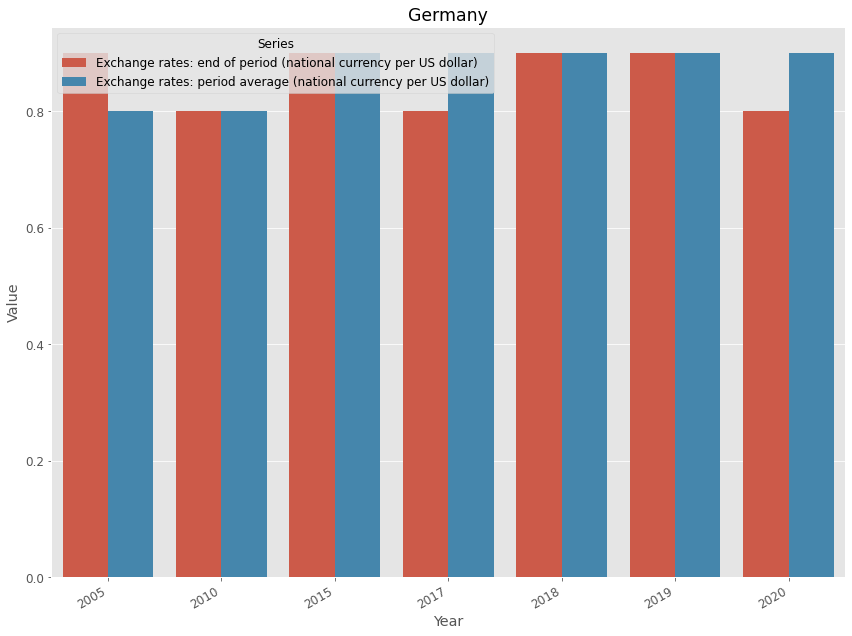

In [24]:
plot_bar(
    data=df_grpd.get_group('Germany'),
    x='Year', y='Value', hue='Series',
    xlabel='Year', ylabel='Value', title='Germany'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, title=None, xlabel=None, ylabel=None)>

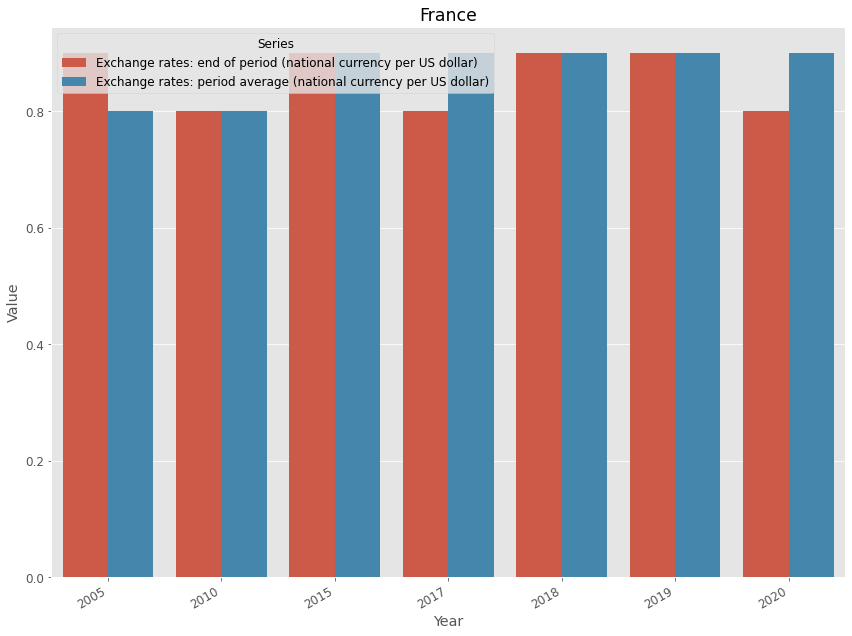

In [25]:
plot_bar(
    data=df_grpd.get_group('France'),
    x='Year', y='Value', hue='Series',
    xlabel='Year', ylabel='Value', title='France'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, title=None, xlabel=None, ylabel=None)>

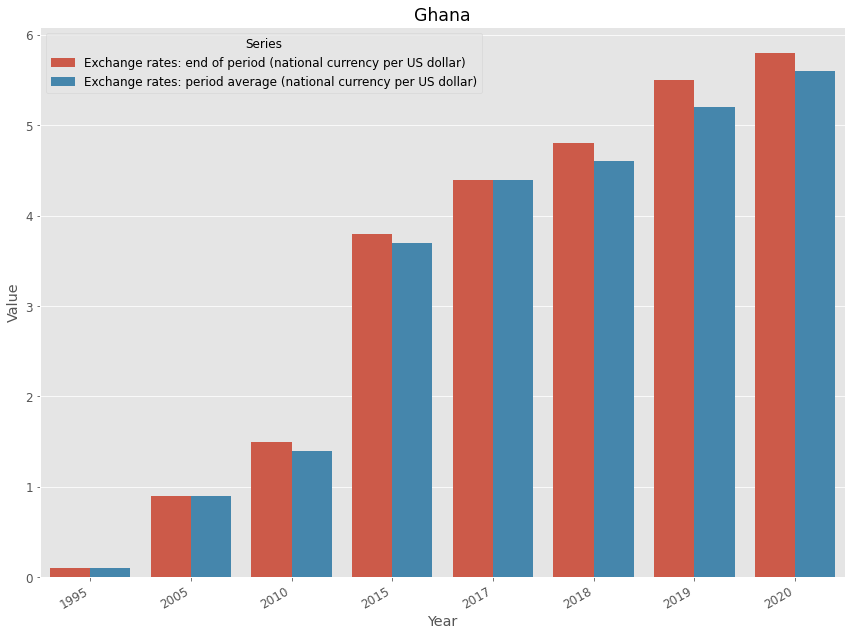

In [26]:
plot_bar(
    data=df_grpd.get_group('Ghana'),
    x='Year', y='Value', hue='Series',
    xlabel='Year', ylabel='Value', title='Ghana'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, title=None, xlabel=None, ylabel=None)>

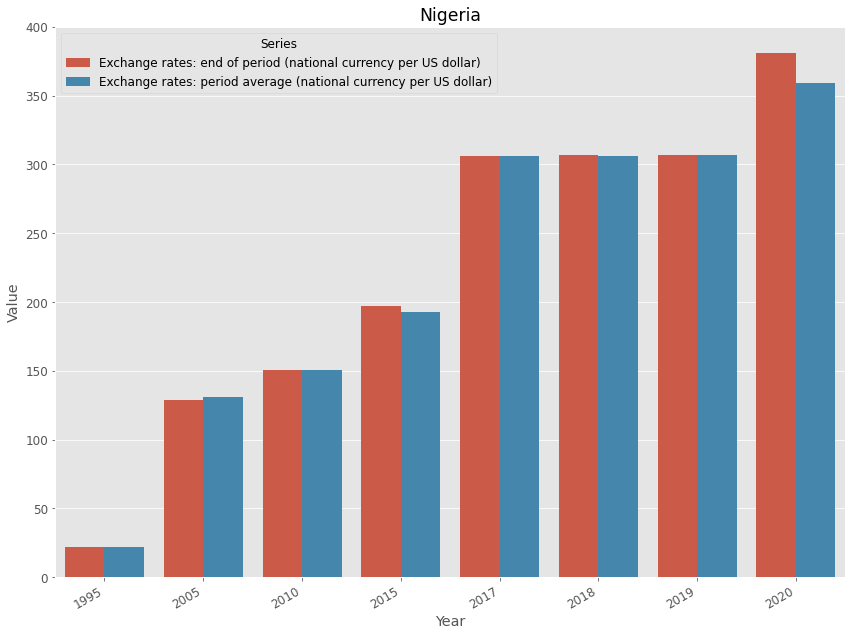

In [27]:
plot_bar(
    data=df_grpd.get_group('Nigeria'),
    x='Year', y='Value', hue='Series',
    xlabel='Year', ylabel='Value', title='Nigeria'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, title=None, xlabel=None, ylabel=None)>

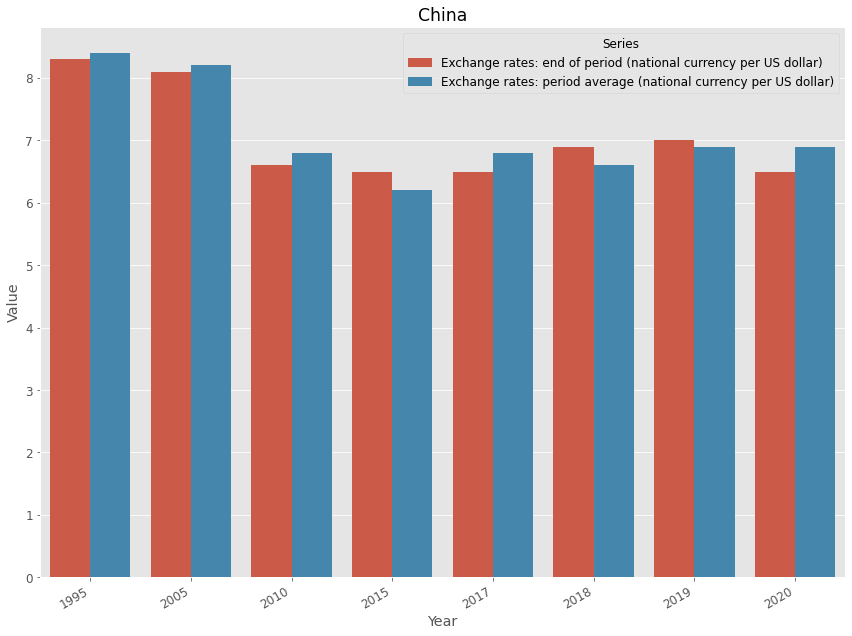

In [28]:
plot_bar(
    data=df_grpd.get_group('China'),
    x='Year', y='Value', hue='Series',
    xlabel='Year', ylabel='Value', title='China'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, title=None, xlabel=None, ylabel=None)>

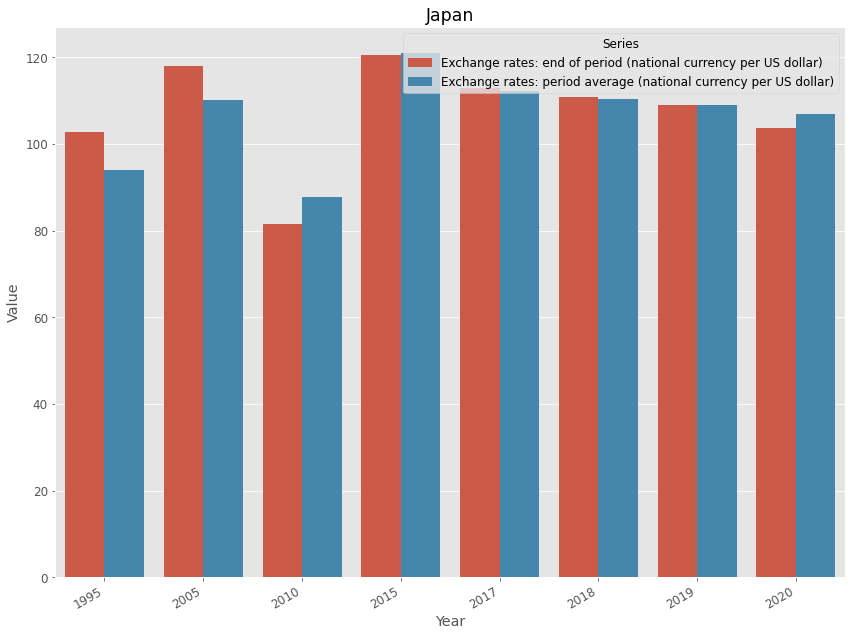

In [29]:
plot_bar(
    data=df_grpd.get_group('Japan'),
    x='Year', y='Value', hue='Series',
    xlabel='Year', ylabel='Value', title='Japan'
)